# <font color='#d50283'>S03 T02: Visualització gràfica de Múltiples variables
</font>

##  Visualització gràfica de Múltiples variables.

### Luis Ortas



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud

from matplotlib import cm
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

import matplotlib
from wordcloud import WordCloud
import matplotlib.pyplot as plt

***
# Exercici 1

**Realitza la pràctica del notebook a GitHub "03 EXAMINING DATA" amb seaborn i el dataset "tips".**

*Importamos dataset*

In [2]:
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [3]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [4]:
tips.shape

(244, 7)

In [5]:
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


***
*Creamos una columna. los porcentajes de la propinas en relación a la cuenta total. Nos permitirá valorar la relación de las propinas con el total de la cuenta.*

In [6]:
tips['tip_pct']=round(((tips['tip']/tips['total_bill'])*100),2)
tips

,total_bill,tip,sex,smoker,day,time,size,tip_pct
0,16.99,1.01,Female,No,Sun,Dinner,2,5.94
1,10.34,1.66,Male,No,Sun,Dinner,3,16.05
2,21.01,3.50,Male,No,Sun,Dinner,3,16.66
3,23.68,3.31,Male,No,Sun,Dinner,2,13.98
4,24.59,3.61,Female,No,Sun,Dinner,4,14.68
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,20.39
240,27.18,2.00,Female,Yes,Sat,Dinner,2,7.36
241,22.67,2.00,Male,Yes,Sat,Dinner,2,8.82
242,17.82,1.75,Male,No,Sat,Dinner,2,9.82


In [7]:
tips.describe()

,total_bill,tip,size,tip_pct
count,244.000000,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672,16.079754
std,8.902412,1.383638,0.951100,6.107020
min,3.070000,1.000000,1.000000,3.560000
25%,13.347500,2.000000,2.000000,12.910000
50%,17.795000,2.900000,2.000000,15.475000
75%,24.127500,3.562500,3.000000,19.147500
max,50.810000,10.000000,6.000000,71.030000


***
# Analisis

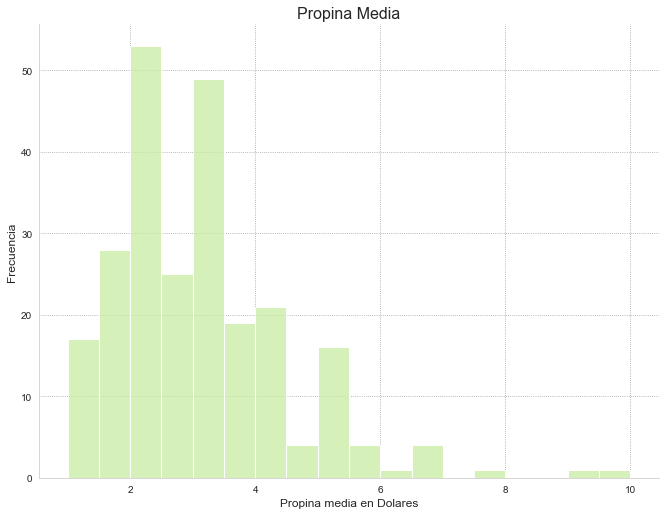

In [8]:
x = tips.tip.mean()
x = round(x, 3)


 
sns.set_style('whitegrid', {"grid.color": ".6", "grid.linestyle": ":"})
sns.displot(x='tip',data=tips,height=7, aspect=8/6,color="#C7EDA2")

plt.title('Propina Media', fontsize = 16)
plt.ylabel('Frecuencia',fontsize = 12)
plt.xlabel('Propina media en Dolares', fontsize = 12)
plt.show()


Los importes más frecuentes de las propinas están entre 2 y 4

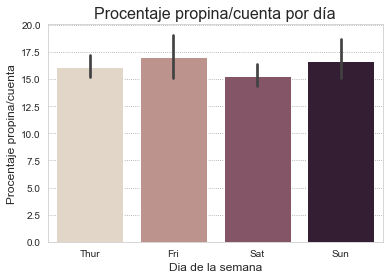

In [9]:

sns.set_style('whitegrid', {"grid.color": ".6", "grid.linestyle": ":"})
sns.barplot(x='day', y='tip_pct',  data=tips, palette="ch:.25")
plt.title('Procentaje propina/cuenta por día', fontsize = 16)
plt.ylabel('Procentaje propina/cuenta',fontsize = 12)
plt.xlabel('Dia de la semana', fontsize = 12)
#plt.legend()
plt.show()


### Comparamos el número de propinas, el valor medio de la propina y el porcentaje de la propina/cuenta por día de de la semana

Text(0.5, 1.0, 'Propina media por día de la semana')

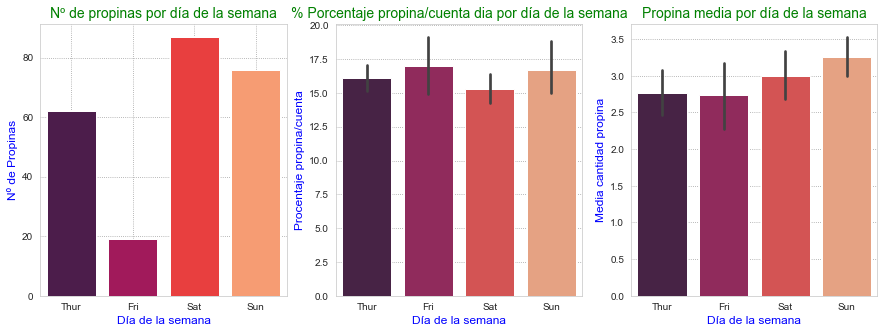

In [10]:
f, (ax1, ax2,ax3) = plt.subplots(1, 3, figsize=(15, 5), sharex=True)

# numero de propinas por día
x=tips.day
sns.histplot(data=tips, x=x,hue="day",shrink=.8, alpha=1, legend=False,palette="rocket",  ax=ax1)



# Add some text for labels, title and custom x-axis tick labels, etc.
ax1.set_ylabel('Nº de Propinas',fontsize=12,color='blue')
ax1.set_xlabel('Día de la semana',fontsize=12,color='blue')

ax1.set_title('Nº de propinas por día de la semana',fontsize=14,color='green')




# Procentaje de propinas por día

y2=tips.tip_pct
sns.barplot(x=x, y=y2, palette="rocket", ax=ax2)

ax2.set_ylabel('Procentaje propina/cuenta',fontsize=12,color='blue')
ax2.set_xlabel('Día de la semana',fontsize=12,color='blue')

ax2.set_title('% Porcentaje propina/cuenta dia por día de la semana',fontsize=14,color='green')

# Euros tips por día.

y3=tips.tip
sns.barplot(x=x, y=y3, palette="rocket", ax=ax3)

ax3.set_ylabel('Media cantidad propina',fontsize=12,color='blue')
ax3.set_xlabel('Día de la semana',fontsize=12,color='blue')

ax3.set_title('Propina media por día de la semana',fontsize=14,color='green')


### Los sabados y los domingos son los días que más prpinas se dan y más cantidad media.
#### Los jueves y viernes los clientes invierten más en propinas (en relación a la cuenta)  pero no el total  es inferior.

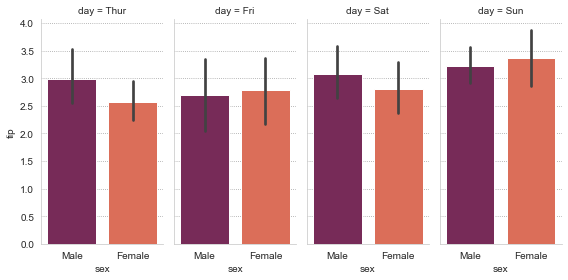

In [11]:
g = sns.FacetGrid(tips, col="day", height=4, aspect=.5)
g.map(sns.barplot, "sex", "tip", order=["Male", "Female"], palette='rocket')

### Las mujeres y los hombres dan las mimas propinas (Depende del día)

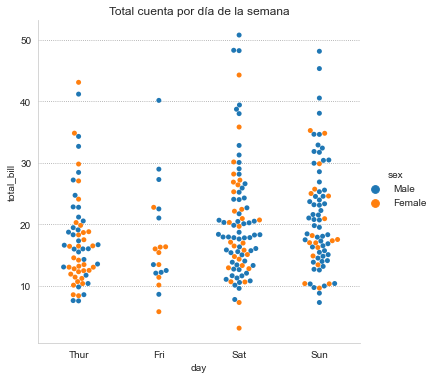

In [12]:
## Total cuenta por día de la semana

sns.catplot(x="day", y="total_bill", hue="sex", kind="swarm", data=tips)
plt.title('Total cuenta por día de la semana')
plt.show()

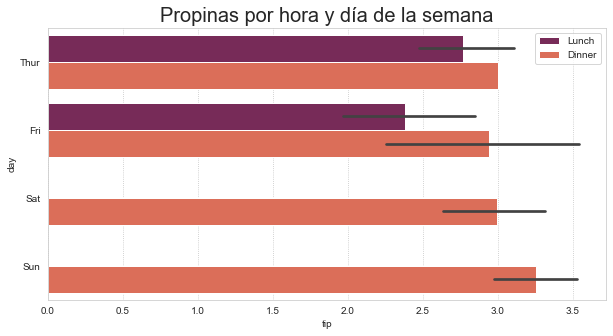

In [13]:


plt.figure(figsize=(10,5))
sns.set_style('whitegrid', {"grid.color": ".75", "grid.linestyle": ":"})
sns.barplot(x='tip', y='day', hue='time', data=tips, orient='h',palette='rocket')

plt.title('Propinas por hora y día de la semana', fontsize=20)
plt.legend(loc='upper right')

plt.show()

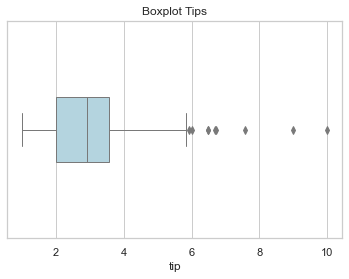

In [14]:
sns.set(style="whitegrid")
ax = sns.boxplot(x = tips['tip'], color='lightblue', fliersize=5, orient='v', linewidth=1, width=0.3)

plt.title('Boxplot Tips')

plt.show()

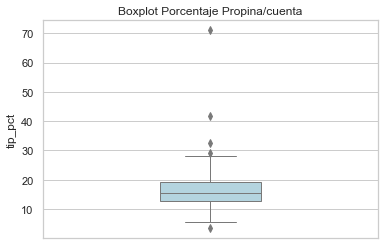

In [15]:
sns.boxplot(y="tip_pct", data=tips[tips.tip < 10],  color='lightblue', fliersize=5,  orient='v', linewidth=1 , width=0.3)
plt.title('Boxplot Porcentaje Propina/cuenta')
plt.show()

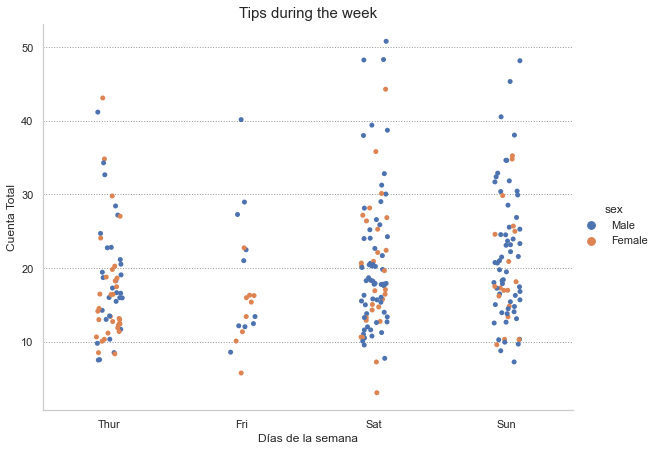

In [16]:
#Representation of more variables, total bill by female or male customers
sns.set_style('whitegrid', {"grid.color": ".6", "grid.linestyle": ":"})

sns.catplot(x='day', y='total_bill', hue = 'sex', data=tips, orient='v',height=6, aspect=8/6)

plt.title('Tips during the week', fontsize = 15)
plt.xlabel('Días de la semana', fontsize = 12)
plt.ylabel('Cuenta Total', fontsize = 12)

plt.show()

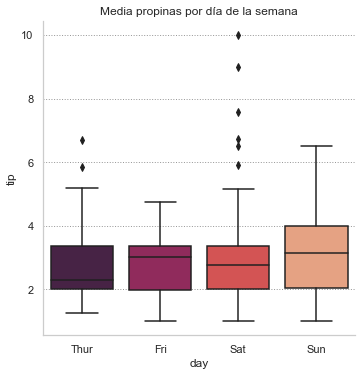

In [17]:
## añadimos variable categorica 'day' en x:
ax = sns.catplot(x='day', y='tip', kind='box',
                 data=tips,palette='rocket')
plt.title('Media propinas por día de la semana')
plt.show()

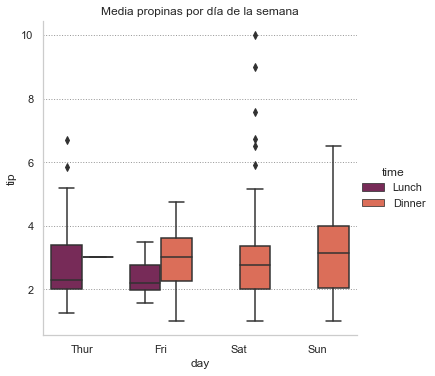

In [18]:
## añadimos variable categorica 'day' en x:
ax = sns.catplot(x='day', y='tip',hue='time', kind='box',
                 data=tips,palette='rocket')

plt.title('Media propinas por día de la semana')
plt.show()
